<div>
<a href="https://www.audiolabs-erlangen.de/fau/professor/mueller"><img src="data_layout/PCP_Teaser.png" width=100% style="float: right;" alt="PCP Teaser"></a>
</div>

# Visualization Using Matplotlib

This notebook gives a short introduction to data visualization using the Python library [Matplotlib](https://matplotlib.org/).

<ul>
    <li><a href='#vis1D'>Basic Plotting Function (1D)</a></li>
    <li><a href='#vis2D'>Plotting Figures (2D)</a></li>
    <li><a href='#vis3D'> Plotting Surfaces (3D)</a></li>
    <li><a href='#exercise_vis1D'>Exercise 1: Plotting 1D Function</a></li>
    <li><a href='#exercise_circle'>Exercise 2: Plotting Circle</a></li>    
    <li><a href='#exercise_logaxis'>Exercise 3: Plotting with Logarithmic Axes</a></li>
    <li><a href='#exercise_plot3d'>Exercise 4: Plotting 3D Surface (sinc)</a></li>  
    <li><a href='#exercise_erlangen'>Exercise 5: Photo Manipulation (Erlangen)</a></li>       
</ul> 

## Python Packages for Visualization

The library `matplotlib` is a widely used Python package for graphics, which allows a user to produce high-quality figures in a variety of formats as well as interactive environments across platforms. The [main website](https://matplotlib.org/) contains detailed documentation and links to illustrative code examples. In particular, we recommend having a look at the [gallery](https://matplotlib.org/gallery/index.html), which contains numerous examples of the many things one can do with `matplotlib`. An alternative to `matplotlib` is `seaborn` ([main website](https://seaborn.pydata.org/)), which is a library mainly targeting on visualizing statistical data. 

In this notebook, we focus on [`matplotlib.pyplot`](https://matplotlib.org/api/pyplot_api.html), which provides a plotting framework similar to MATLAB. In the following, we import `matplotlib.pyplot` using the abbreviation `plt` (following general conventions) and use the Python command `dir(plt)` that lists all names contained in the module.

In [1]:
import matplotlib.pyplot as plt
list_plt_names = dir(plt)
print(list_plt_names)

['Annotation', 'Arrow', 'Artist', 'AutoLocator', 'Axes', 'Button', 'Circle', 'Figure', 'FigureCanvasBase', 'FixedFormatter', 'FixedLocator', 'FormatStrFormatter', 'Formatter', 'FuncFormatter', 'GridSpec', 'IndexLocator', 'Line2D', 'LinearLocator', 'Locator', 'LogFormatter', 'LogFormatterExponent', 'LogFormatterMathtext', 'LogLocator', 'MaxNLocator', 'MultipleLocator', 'Normalize', 'NullFormatter', 'NullLocator', 'Number', 'PolarAxes', 'Polygon', 'Rectangle', 'ScalarFormatter', 'Slider', 'Subplot', 'SubplotTool', 'Text', 'TickHelper', 'Widget', '_INSTALL_FIG_OBSERVER', '_IP_REGISTERED', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_auto_draw_if_interactive', '_backend_mod', '_get_running_interactive_framework', '_interactive_bk', '_log', '_pylab_helpers', '_setp', '_setup_pyplot_info_docstrings', '_show', 'acorr', 'angle_spectrum', 'annotate', 'arrow', 'autoscale', 'autumn', 'axes', 'axhline', 'axhspan', 'axis', 'axvline', 'a

<a id='vis1D'></a> 
## Basic Plotting Function (1D)

We start with some basic examples that show how the library `matplotlib` works. First, we import all Python packages required in this notebook. The command `%matplotlib inline` ensures that the backend of `matplotlib` is set to `inline` such that figures are displayed within the Jupyter notebook. 

In [2]:
import os
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

We start with the plotting function [`plt.plot`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html). Given two real-valued vectors `x` and `y` of the same length, `plt.plot(x,y)` plots `y` against `x` as lines and/or markers. In the following example, we generate a (discrete) time axis `t` ranging from $-\pi$ and $\pi$. Then, we plot the graph of the sine and cosine function over this time axis in the same figure using the default setting of the `plot`-function. 

* The command [`plt.figure(figsize=(8, 3))`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html) is used to create a new figure of a specific size determined by `figsize`.
* The command [`tight_layout()`](https://matplotlib.org/users/tight_layout_guide.html) is used to automatically adjust the final layout of the generated figure. 

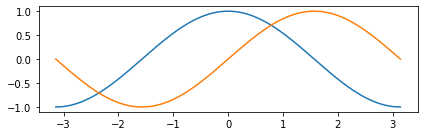

In [3]:
t = np.linspace(-np.pi, np.pi, 256, endpoint=True)
f_cos = np.cos(t)
f_sin = np.sin(t)

plt.figure(figsize=(6, 2))
plt.plot(t, f_cos)
plt.plot(t, f_sin)
plt.tight_layout()

Next, we show how one may deviate from the plotting default settings. In particular, we modify the figure by changing colors, adding a legend and labels, and modifying the axes. Furthermore, we export the figure as `PNG` file.

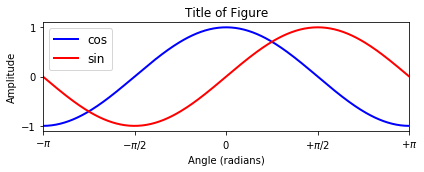

In [4]:
plt.figure(figsize=(6, 2.5))
plt.title('Title of Figure', fontsize=12)
t = np.linspace(-np.pi, np.pi, 256, endpoint=True)
f_cos = np.cos(t)
f_sin = np.sin(t)
plt.plot(t, f_cos, color='blue', linewidth=2.0, linestyle='-', label='cos')
plt.plot(t, f_sin, color='red', linewidth=2.0, linestyle='-', label='sin')
plt.legend(loc='upper left', fontsize=12)
plt.xlim(-np.pi, np.pi)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'], fontsize=10)
plt.ylim(f_cos.min() * 1.1, f_cos.max() * 1.1)
plt.yticks([-1, 0, 1], fontsize=10)
plt.xlabel('Angle (radians)')
plt.ylabel('Amplitude')
plt.tight_layout()

# This requires that the output folder exists
output_path_filename = os.path.join('.', 'output', 'Figure_CosSin.png')
plt.savefig(output_path_filename)

The next example demonstrates how to create subplots using [`subplot` ](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplot.html) and [`axes` ](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.axes.html). 

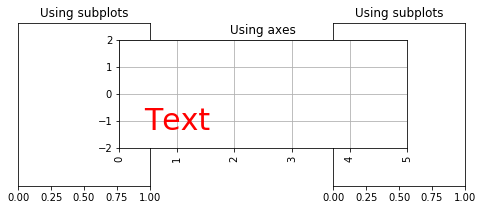

In [5]:
plt.figure(figsize=(8, 3))

plt.subplot(1, 3, 1)
plt.yticks(())
plt.title('Using subplots', fontsize=12)

plt.subplot(1, 3, 3)
plt.yticks(())
plt.title('Using subplots', fontsize=12)

plt.axes([0.3, 0.3, 0.5, 0.5])    # [left, bottom, width, height]
plt.title('Using axes', fontsize=12)
plt.xlim(0, 5)
plt.ylim(-2, 2)
plt.grid()
ax = plt.gca()
plt.setp(ax.get_xticklabels(), rotation='vertical', fontsize=10)
plt.text(1, -1, 'Text', ha='center', va='center', size=30, color='red')

output_path_filename = os.path.join('.', 'output', 'Figure_Subplots.png')
plt.savefig(output_path_filename)

<a id='vis2D'></a> 
## Plotting Figures (2D)

Next, we consider the function [`plt.imshow`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html), which can be used to visualize data on a 2D regular raster. In particular, the function can be used to visualize a real-valued matrix (two-dimensional array), where the matrix values are shown in a color-coded form. Some basic functionalities and parameters are illustrated by the next example. 

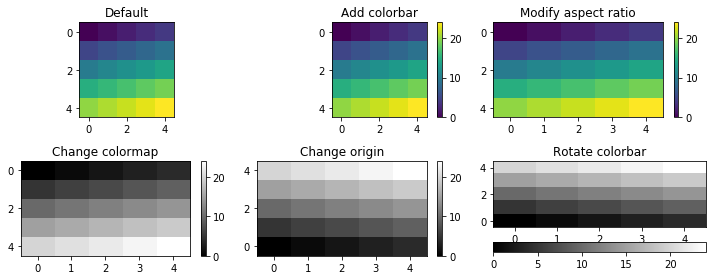

In [6]:
A = np.arange(5*5).reshape(5, 5)

plt.figure(figsize=(10, 4))
plt.subplot(2, 3, 1)
plt.imshow(A)
plt.title('Default')

plt.subplot(2, 3, 2)
plt.imshow(A)
plt.colorbar()
plt.title('Add colorbar')

plt.subplot(2, 3, 3)
plt.imshow(A, aspect='auto')
plt.colorbar()
plt.title('Modify aspect ratio')

plt.subplot(2, 3, 4)
plt.imshow(A, aspect='auto', cmap='gray')
plt.colorbar()
plt.title('Change colormap')

plt.subplot(2, 3, 5)
plt.imshow(A,  aspect='auto', cmap='gray', origin='lower')
plt.colorbar()
plt.title('Change origin')

plt.subplot(2, 3, 6)
plt.imshow(A,  aspect='auto', cmap='gray', origin='lower')
plt.colorbar(orientation='horizontal')
plt.title('Rotate colorbar')
plt.tight_layout()

As can be seen in the previous figure, the image is positioned such that the pixel centers fall on zero-based (row, column) indices. To have tick labels with some semantic meaning (e.g., a linear axis given in seconds or centimeters rather than in pixels or samples), one can use the `extent` keyword argument to specify the data coordinates `[left, right, lower, upper]`, where `left` and `right` correspond the range of the horizontal axis, and `lower` and `upper` to the range of the vertical axis. Furthermore, one can use the functions `plt.xlim` and `plt.ylim` to zoom into a specific part of the figure. Note that the limits used in `plt.xlim` and `plt.ylim` refer to the coordinates specified by the  `extent` coordinates. This is illustrated by the following code example.

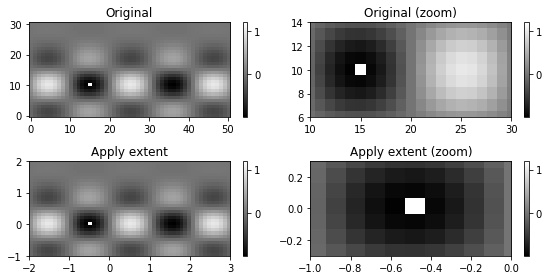

In [7]:
X, Y = np.meshgrid(np.arange(-2, 3.1, 0.1), np.arange(-1, 2.1, 0.1))
A = np.sin(X*3) * np.cos(Y*3) * np.exp(-Y**2)
A[10, 15] = 1.2

plt.figure(figsize=(8, 4))
plt.subplot(2, 2, 1)
plt.imshow(A,  aspect='auto', cmap='gray', origin='lower')
plt.colorbar()
plt.title('Original')

plt.subplot(2, 2, 2)
plt.imshow(A,  aspect='auto', cmap='gray', origin='lower')
plt.colorbar()
plt.xlim((10, 30))
plt.ylim((6, 14))
plt.title('Original (zoom)')

plt.subplot(2, 2, 3)
plt.imshow(A,  aspect='auto', cmap='gray', origin='lower', extent=[-2, 3, -1, 2])
plt.colorbar()
plt.title('Apply extent')

plt.subplot(2, 2, 4)
plt.imshow(A,  aspect='auto', cmap='gray', origin='lower', extent=[-2, 3, -1, 2])
plt.colorbar()
plt.xlim((-1, 0))
plt.ylim((-0.3, 0.3))
plt.title('Apply extent (zoom)')

plt.tight_layout()

<a id='vis3D'></a> 
## Plotting Surfaces (3D)

The library `matplotlib` also offers various possibilities for creating 3D plots. Technically one needs to create a figure and add a new axis of type `Axes3D` to it. For details, we refer to the [mplot3d tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html) and consider only one example. Based on the previously visualized matrix, the following plot shows a 3D representation of the same data.

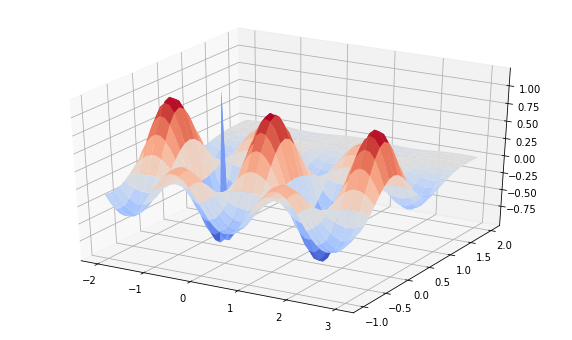

In [8]:
from mpl_toolkits.mplot3d import Axes3D

X, Y = np.meshgrid(np.arange(-2, 3.1, 0.1), np.arange(-1, 2.1, 0.1))
A = np.sin(X*3) * np.cos(Y*3) * np.exp(-Y**2)
A[10, 15] = 1.2

fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, A, cmap='coolwarm');

## Exercises and Results

In [9]:
import libpcp.vis
show_result = True

<a id='exercise_vis1D'></a> 
<div class="alert alert-block alert-info">
<strong>Exercise 1: Plotting 1D Function</strong><br>
    <ul>
        <li> Create a vector <code>t</code> that represents a discrete time axis (given in seconds) covering the interval $[0, 1]$ sampled with a sampling rate of $F_\mathrm{s}=100~\mathrm{Hz}$. (In other words <code>t[0]=0, t[1]=0.01, ...,t[100]=1 </code>.)</li>
        <li> Plot the graph of the sinusoid $x(t) = \mathrm{sin}(2\pi \omega t)$ using frequency $\omega = 5~\mathrm{Hz}$ over the time points specified by <code>t</code>.</li>
        <li> Label the horizontal axis (<code>Time (seconds)</code>) and vertical axis (<code>Amplitude</code>) and add a title. Display grid lines.</li>
        <li>Modify the appearance of the sinusoid by varying the arguments <code>color</code>, <code>linewidth</code>, <code>linestyle</code>, and <code>marker</code> in the <code>plt.plot</code> function. You can find a table of all possible arguments <a href="https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html">here</a>.
        <li>Set the limits of the horizontal axis such that only one period of the sinusoid is shown.</li>
        <li>Use a figure with three subplots and plot one period of the sinusoid using the Python functions <code>plt.stem</code>, <code>plt.step</code>, and <code>plt.bar</code>. Explain the differences.
</ul>
</div>

In [10]:
#<solution>
# Your Solution
#</solution>

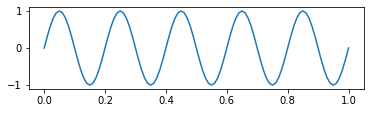

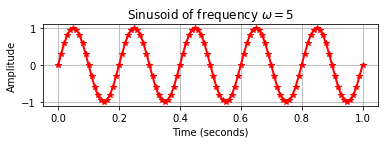

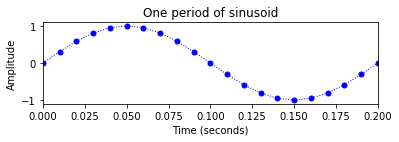

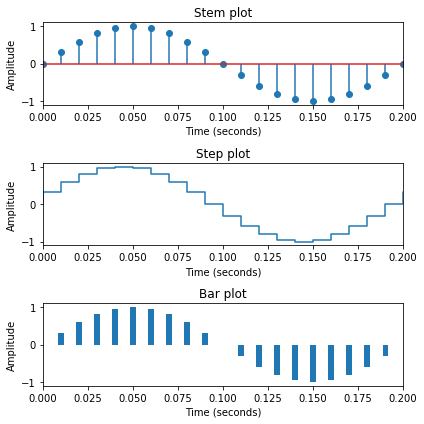

In [11]:
libpcp.vis.exercise_vis1D(show_result=show_result)

<a id='exercise_circle'></a> 
<div class="alert alert-block alert-info">
<strong>Exercise 2: Plotting Circle</strong><br>
    <ul>
    <li> Create a vector <code>t</code> that represents a discrete time axis (given in seconds) covering the interval $[0, 1]$ sampled with a sampling rate of $F_\mathrm{s}$ given in $\mathrm{Hz}$. (See <a href='#ex:vis1D'>Exercise 1: Plotting 1D Function</a>.)</li>        
        <li> Specify two functions $f_1(t)$ and $f_2(t)$ such that one obtains a unit circle when plotting the values $f_1(t)$ against the values of $f_2(t)$ using <code>np.plot</code>.</li>
        <li>Write a function <code>plot_circle</code> that plots a circle in this way with an argument that specifies the sampling rate $F_\mathrm{s}$.</li>
        <li>Apply the function using different sampling rates $F_\mathrm{s}\in\{4,8,16,32\}$</li> </ul>   
</div>

In [12]:
#<solution>
# Your Solution
#</solution>

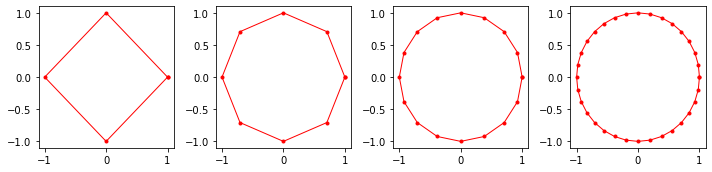

In [13]:
libpcp.vis.exercise_circle(show_result=show_result)

<a id='exercise_logaxis'></a> 
<div class="alert alert-block alert-info">
<strong>Exercise 3: Plotting with Logarithmic Axes</strong><br>
Consider functions $f(x) = e^x$, $g(x) = x$, and $h(x)=1.1 + \mathrm{sin}(10\cdot x)$ for $x\in\mathbb{R}$. For a given sampling rate <code>Fs</code>, let  <code>x = np.arange(1/Fs, 10+1/Fs, 1/Fs)</code> be the discretized axis covering the interval <code>[1/Fs, 10]</code>. Furthermore, let <code>f</code>, <code>g</code>, and <code>h</code> be the vectors obtained by evaluating $f$, $g$, and $h$ on <code>x</code>, respectively. Using the sampling rate <code>Fs=100</code>, plot the graphs for all three functions in the same figure (using different colors). Switch on the grid-line option (using <code>plt.grid()</code>). Besides using <code>plt.plot</code>, also use the functions <code>plt.semilogy</code>, <code>plt.semilogx</code>, <code>plt.loglog</code>. What do you observe?
</div>

In [14]:
#<solution>
# Your Solution
#</solution>

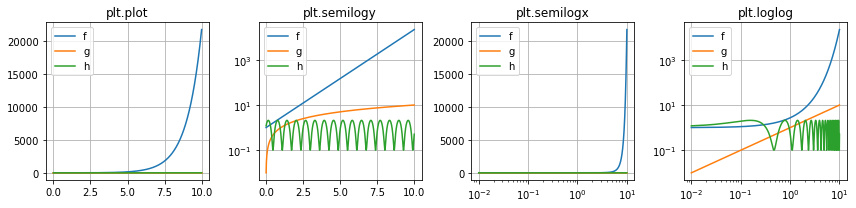

In [15]:
libpcp.vis.exercise_logaxis(show_result=show_result)

<a id='exercise_plot3d'></a> 
<div class="alert alert-block alert-info">
<strong>Exercise 4: Plotting 3D Surface (sinc)</strong><br>
The $\mathrm{sinc}$-function (<code>np.sinc</code>) is defined by $\mathrm{sinc}(t) := \frac{\mathrm{sin}(\pi t)}{\pi t}$ for $t\in\mathbb{R}$ and $\mathrm{sinc}(0):=0$. In the following, we want to visualize the surface of the function $f(x,y) = \mathrm{sinc}(3x) + \mathrm{sinc}(3y)$ for variables $x, y \in [-1,\, 1]$. To this end, we represent the area $[-1,\, 1]$ by an equidistant 2D-grid with a resolution specified by parameters $\Delta x = \Delta y = 0.01$. The grid points are represented by two equal-sized matrices $\mathbf{X}$ and $\mathbf{Y}$, where $\mathbf{X}$ contains all $x$-coordinates and $\mathbf{Y}$ all $y$-coordinates:
   
\begin{align*}
\mathbf{X} & = 
\begin{bmatrix}
	-1 & -0.99 & -0.98 & \cdots &  & 0.98 & 0.99 & 1\cr
	-1 & -0.99 & -0.98 & \cdots &  & 0.98 & 0.99 & 1\cr
	\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots &
						\vdots\cr
	-1 & -0.99 & -0.98 & \cdots &  & 0.98 & 0.99 & 1\cr
	-1 & -0.99 & -0.98 & \cdots &  & 0.98 & 0.99 & 1\cr
\end{bmatrix}
\\[1mm]
\mathbf{Y} & =
\begin{bmatrix}
	-1 & -1 & -1 & \cdots &  & -1 & -1 & -1\cr
	-0.99 & -0.99 & -0.99 & \cdots &  & -0.99 & -0.99 & -0.99\cr
	\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots &
						\vdots\cr
	0.99 & 0.99 & 0.99 & \cdots &  & 0.99 & 0.99 & 0.99\cr
	1 & 1 & 1 & \cdots &  & 1 & 1 & 1\cr
\end{bmatrix}
\end{align*}

<ul> 
<li> Create the matrices <code>X</code> and <code>Y</code> that have data points with a spacing of $\Delta x = \Delta y = 0.01$ using the function <code>np.meshgrid</code>.</li>
<li> Evaluate the function $f(x,y)$ on the grid defined by <code>X</code> and <code>Y</code>.</li>
<li> Plot the 3D-surface using the function <code>plot_surface</code>. </li>
<!--Get yourself familiar with the interactive environment.-->
<li> Experiment with different colormaps of the plot. All available colormaps can be found <a href="https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html">here</a>.</li>
<li> Use the function <code>plot_wireframe</code> to visualize the function. What is the difference to <code>plot_surface</code>?</li>
</ul>
</div>

In [16]:
#<solution>
# Your Solution
#</solution>

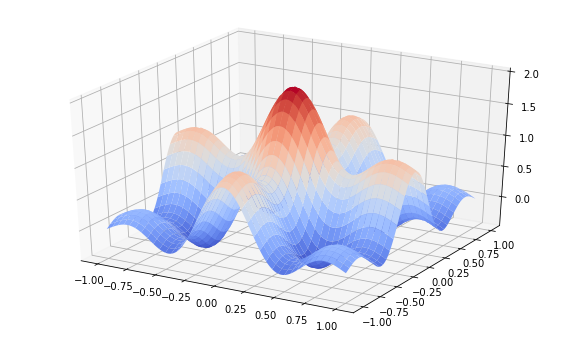

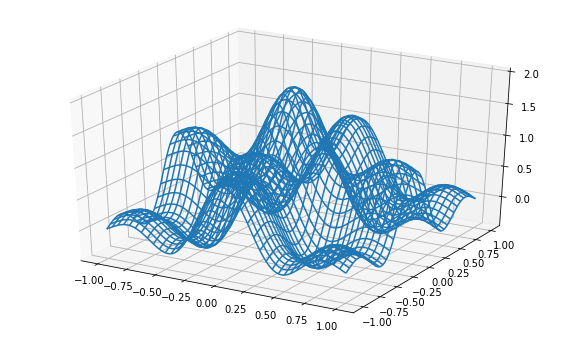

In [17]:
libpcp.vis.exercise_plot3d(show_result=show_result)

<a id='exercise_erlangen'></a> 
<div class="alert alert-block alert-info">
<strong>Exercise 5: Photo Manipulation (Erlangen)</strong><br>
In this exercise we study who one may represent and manipulate digital images using <code>matplotlib</code>. 
<ul> 
<li>First, import <code>matplotlib.image</code> as <code>mpimg</code>.</li>
<li>Using <code>mpimg.imread</code>, load the photo <code>'./data/PCP_fig_erlangen.png'</code>, which shows the castle of the city of Erlangen (home of FAU). This results in an NumPy array of size <code>(274, 400, 3)</code>. Check this! While the first two dimensions specify the number of pixels in horizontal and vertical direction, the third dimension are the color channels of the RGB (red, green, blue) color space.</li>
<li> Display the image using <code>plt.imshow</code>.</li>
<li> Rotate the image by $180^\circ$ using the function <code>np.rot90</code>.</li>
<li> Convert the color image into a black&ndash;with figure by summing over the channels. Furthermore, set <code>cmap='gray'</code> in <code>plt.imshow</code>.</li>
<li> Try to extract edges, e.g., by applying <code>np.diff</code>.</li>
<li> Be creative to further modify the image, e.g., by manipulating the channels and the changing colormap specified by <code>cmap</code>.  </li>
<li> Save your modified images using <code>mpimg.imsave('./output/PCP_fig_erlangen_mod.png', img_mod)</code></li>
</ul>
<br>
Picture by <a href="https://commons.wikimedia.org/wiki/User:Selby">Selby</a>. Licensed under <a href="https://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>.
</div>

In [18]:
#<solution>
# Your Solution
#</solution>

Size of image array (pixels, pixels, channels):  (274, 400, 3)


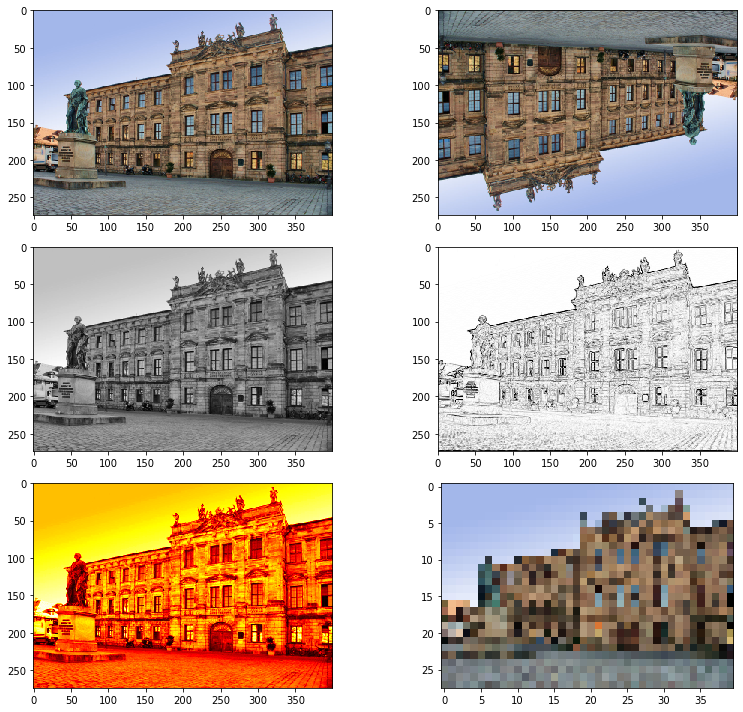

In [19]:
libpcp.vis.exercise_erlangen(show_result=show_result)

<div>
<a href="https://opensource.org/licenses/MIT"><img src="data_layout/PCP_License.png" width=100% style="float: right;" alt="PCP License"></a>
</div>